In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd /content/drive/My Drive/Image task/

/content/drive/My Drive/Image task


In [0]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)

In [0]:
data.shape

(409, 2)

In [0]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

Using TensorFlow backend.


### Loading few images 

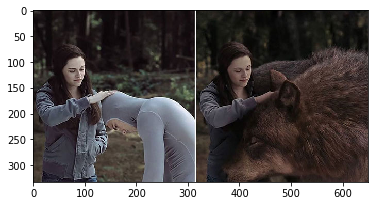

In [0]:
# https://stackoverflow.com/questions/33480297/viewing-npy-images
from matplotlib import pyplot as plt

plt.imshow(data[0][0], cmap='gray')
plt.show()

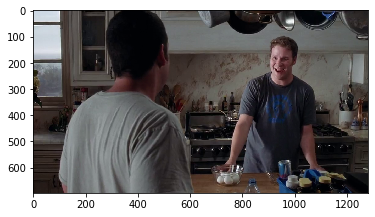

In [0]:
plt.imshow(data[1][0], cmap='gray')
plt.show()

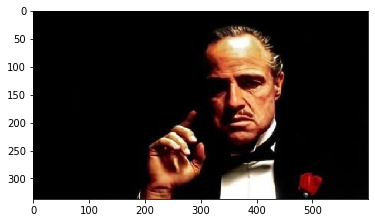

In [0]:
plt.imshow(data[10][0], cmap='gray')
plt.show()

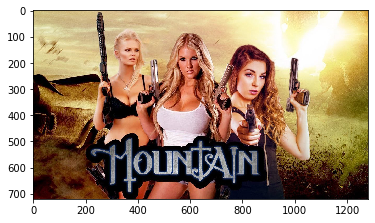

In [0]:
plt.imshow(data[100][0], cmap='gray')
plt.show()

In [0]:
y = []
for i in range(len(data)):
  y.append(data[i][1])

In [24]:
y[0]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

In [0]:
## ref: https://stackoverflow.com/questions/34128104/tensorflow-creating-mask-of-varied-lengths
import tensorflow as tf
def tf_bbox2mask(y1, x1, y2, x2, img_H, img_W):
    ## Repeat for each row or column
    y1_transposed = tf.expand_dims(tf.tile(y1,[img_W]), 0)
    x1_transposed = tf.expand_dims(tf.tile(x1,[img_H]), 1)
    y2_transposed = tf.expand_dims(tf.tile(y2,[img_W]), 0)
    x2_transposed = tf.expand_dims(tf.tile(x2,[img_H]), 1)
    ## Get the range grid
    range_row = tf.cast(tf.expand_dims(tf.range(0, img_H, 1), 1), tf.int32)
    range_col = tf.cast(tf.expand_dims(tf.range(0, img_W, 1), 0), tf.int32)
    ## Generate bollean masks
    mask_y1 = tf.less(y1_transposed, range_row)
    mask_x1 = tf.less(x1_transposed, range_col)
    mask_y2 = tf.less(range_row, y2_transposed)
    mask_x2 = tf.less(range_col, x2_transposed)

    result = tf.to_float(mask_y1)*tf.to_float(mask_x1)*tf.to_float(mask_y2)*tf.to_float(mask_x2)
    return result

In [0]:
s = []
for i in y:
  s.append(len(i))
print(max(s))

16


#### There is an image with 16 faces in it

In [0]:
imageHeight = y[0][0]['imageHeight']
imageWidth = y[0][0]['imageWidth']
x1 = y[0][0]['points'][0]['x']
y1 = y[0][0]['points'][0]['x']
x2 = y[0][0]['points'][1]['x']
y2 = y[0][0]['points'][1]['x']
imageHeight, imageWidth, x1, y1

(333, 650, 0.08615384615384615, 0.08615384615384615)

In [22]:
y_mask = []
for i in range(len(y)):
  y_ind = []
  for j in range(i):
    imageHeight = y[i][j]['imageHeight']
    imageWidth = y[i][j]['imageWidth']
    x1 = y[i][j]['points'][0]['x']
    y1 = y[i][j]['points'][0]['y']
    x2 = y[i][j]['points'][1]['x']
    y2 = y[i][j]['points'][1]['y']
    #print('Done')
    y_ind.append((tf_bbox2mask(y1, x1, y2, x2, imageHeight, imageWidth)))
    print("done", i)
  y_mask.append(y_ind)

Done


ValueError: ignored

In [0]:
x2 = y[0][0]['points'][1]['x']
y2 = y[0][0]['points'][1]['x']

In [0]:
x1, y1

(0.1723076923076923, 0.1723076923076923)

In [0]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(img):
    #img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for layer in model.layers[-1:-6]:
    layer.trainable=True

In [0]:
# https://lars76.github.io/neural-networks/object-detection/losses-for-segmentation/
def dice_loss(y_true, y_pred):
  numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=(1,2,3))
  denominator = tf.reduce_sum(y_true + y_pred, axis=(1,2,3))

  return 1 - numerator / denominator

In [0]:
# https://stackoverflow.com/questions/49785133/keras-dice-coefficient-loss-function-is-negative-and-increasing-with-epochs
from keras import backend as K
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
  return 1-dice_coef(y_true, y_pred)

### Defining loss function

In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# # https://gist.github.com/wassname/7793e2058c5c9dacb5212c0ac0b18a8a
# from keras import backend as K

# def dice_coef(y_true, y_pred, smooth=1):
#     """
#     Dice = (2*|X & Y|)/ (|X|+ |Y|)
#          =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
#     ref: https://arxiv.org/pdf/1606.04797v1.pdf
#     """
#     intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#     return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

# def dice_coef_loss(y_true, y_pred):
#     return 1-dice_coef(y_true, y_pred)